# Лабораторная работа №1
Конечномерная оптимизация, градиентные методы

In [12]:
from typing import Tuple, Mapping

import numpy as np
import random
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D  

# Реализовываем функционал градиентного спуска и градиентного спуска с LRS

In [13]:
def GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          iter: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Градиентный спуск.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        iter (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    x_old = x0
    y_old = y0
    for i in range(iter):
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)
    
def GD_LRS(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              iter: int = 100, lre: int = 7, lrdc: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Градиентный спуск + Learning Rate Schedule.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        iter (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        lrdc (float): Коэфициент уменьшения lr [0,1). Default = 0.1.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    x_old = x0
    y_old = y0
    for i in range(iter):
        if ((i%lre)==0):
            lr *= lrdc
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

# Функция Бута
$f(x,y) = (x + 2y - 7)^2 + (2x + y - 5)^2$

In [14]:
def Buta(x: np.ndarray, y: np.ndarray) -> np.float64:
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def grad_Buta(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([10*x+8*y-34, 10*y + 8*x - 38])


In [15]:
print(f'''f(1,3) = 0
Function: {Buta(1,3)}
Gradient: {grad_Buta(1,3)}''')

f(1,3) = 0
Function: 0
Gradient: [0 0]


# Создаем точки

In [16]:
z, y = skl.datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=42)
y = np.zeros(10)
x = np.zeros(10)
for i in range(len(z)):
    x[i],y[i] = z[i]
print('X: ', x, '\nY: ', y)

X:  [ 2.914961   -2.97261532 -0.92998481  3.62704772 -2.743351    3.73185476
  4.70740704 -2.26723535 -2.97867201  6.10552761] 
Y:  [1.41088215 8.54855637 9.78172086 2.28741702 8.78014917 0.56086598
 0.5484215  7.10100588 9.55684617 1.74739338]


# Демонстрация градиентного спуска

X: [ 2.85059433 -3.01923829 -1.279524    3.42134958 -2.83142783  3.65380001
  4.53279262 -2.26859229 -3.1053525   5.69518337]
Y: [1.41659706 8.31150996 9.25794756 2.1485115  8.50160233 0.586231
 0.49698678 6.95228412 9.21945532 1.46421184]
Buta: [  6.21742921  51.0462788  107.66955338  16.44582172  56.10539894
  13.09939478  22.9874813   28.17398344  73.41326641  64.33050459]


Text(0.5, 0, 'Z')

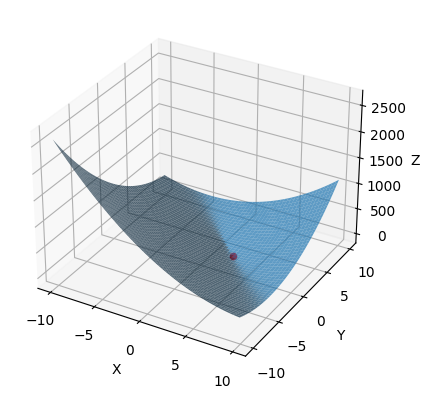

In [17]:
result = GD(Buta, grad_Buta, x, y)
gd_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Buta: {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Buta(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = GD(Buta, grad_Buta, x, y)
ax.scatter(point[0][gd_ind], point[1][gd_ind], point[2][gd_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Демонстрация градиентного спуска с LRS

X: [ 2.914961   -2.97261532 -0.92998481  3.62704772 -2.743351    3.73185476
  4.70740704 -2.26723535 -2.97867201  6.10552761]
Y: [1.41088215 8.54855637 9.78172086 2.28741702 8.78014917 0.56086598
 0.5484215  7.10100588 9.55684617 1.74739338]
Buta: [  6.61706623  56.50251117 143.87394993  22.06985506  64.01698833
  13.75514692  26.06352539  30.2737693   85.40999073  87.01543604]


Text(0.5, 0, 'Z')

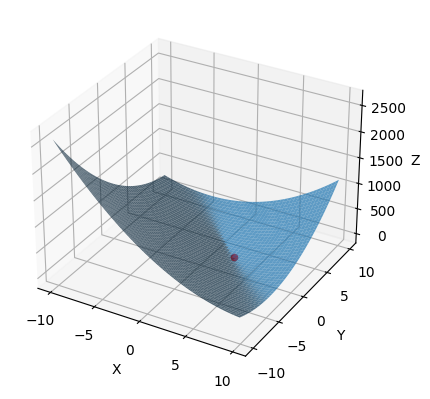

In [18]:
result = GD_LRS(Buta, grad_Buta, x, y)
gds_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Buta: {result[2]}''')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Buta(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = GD_LRS(Buta, grad_Buta, x, y)
ax.scatter(point[0][gds_ind], point[1][gds_ind], point[2][gds_ind], color = "red")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Гиф-анимация

In [19]:
from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation
def save_steps():
    grid_points = 100
    a = b = np.arange(-10.0, 10.0, 0.1)
    X, Y = np.meshgrid(a, b)
    c = np.array(Buta(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
    Z = c.reshape(X.shape)
    levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
    levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())
    x_est = 0.3
    y_est = 0.4
    r = 0.001
    x_list = []
    y_list = []
    fig, ax = plt.subplots(figsize=(9,5))
    cs = ax.contour(X, Y, Z, 50)
    Epochs = 300
    for i in range(Epochs):
        ax.clear()
        ax.clabel(cs, fontsize=9, inline=1)
        cs = ax.contour(X, Y, Z, 50)
        z_est = Buta(x_est, y_est)
        ax.scatter(x_est, y_est, c="r")
        x_list.append(x_est)
        y_list.append(y_est)
        ax.plot(x_list, y_list, c="r")   
        x_est, y_est = x_est - grad_Buta(x_est, y_est)[0] * r, y_est - grad_Buta(x_est, y_est)[1] * r   
        plt.savefig("step{0}".format(i), bbox_inches='tight')
        
#save_steps()


![](Buta.gif)

# Функция Химмельблау
$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$

In [20]:
def Him(x: np.ndarray, y: np.ndarray) -> np.float64:
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_Him(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([4*x**3 + (4*y - 42)*x + 2*y**2 - 14, 4*y**3 + (4*x - 26)*y + 2*x**2 - 22])

In [21]:
print(f'''f(3,2) = 0
Function: {Him(3,2)}
Gradient: {grad_Him(3,2)}
f(-2.805118,3.131312) = 0
Function: {Him(-2.805118,3.131312)}
Gradient: {grad_Him(-2.805118,3.131312)}
f(-3.779310,-3.283186) = 0
Function: {Him(-3.779310,-3.283186)}
Gradient: {grad_Him(-3.779310,-3.283186)}
f(3.584428,-1.848126) = 0
Function: {Him(3.584428,-1.848126)}
Gradient: {grad_Him(3.584428,-1.848126)}''')

f(3,2) = 0
Function: 0
Gradient: [0 0]
f(-2.805118,3.131312) = 0
Function: 1.0989296656869089e-11
Gradient: [ 4.97133561e-06 -4.15751018e-05]
f(-3.779310,-3.283186) = 0
Function: 3.797861082863832e-12
Gradient: [ 2.97052500e-05 -7.92677775e-06]
f(3.584428,-1.848126) = 0
Function: 8.894376497582423e-12
Gradient: [-3.20016529e-05  1.30893338e-05]


In [22]:
z, y = skl.datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=422)
y = np.zeros(10)
x = np.zeros(10)
for i in range(len(z)):
    x[i],y[i] = z[i]
print('X: ', x, '\nY: ', y)

X:  [-5.93985729 -7.90297649 -7.32243805 -4.98938511 -5.7154169  -5.58116201
 -5.403286   -4.69111074 -6.16267676 -4.37717529] 
Y:  [ 1.72609514  1.83010951  4.08492289 -2.10903216 -0.79912419 -2.49563572
  3.52165243 -2.0217292   2.65900127 -1.46497633]


X: [ 0.43870405  9.17317982  6.30947821 -2.48657525 -0.70336698 -1.51296882
 -0.70950165 -2.85309037  1.26504556 -3.02040212]
Y: [ 1.89364271  1.61014623  2.76456649 -2.98093033 -1.60249659 -3.48289779
  3.08748549 -2.81633167  2.71423635 -2.13979909]
Himmelblau: [  88.31062669 5611.37738866 1045.25719711   61.16759277  172.97017231
  161.77641113   58.21865366   35.91097443   47.3587164    45.74773404]


Text(0.5, 0, 'Z')

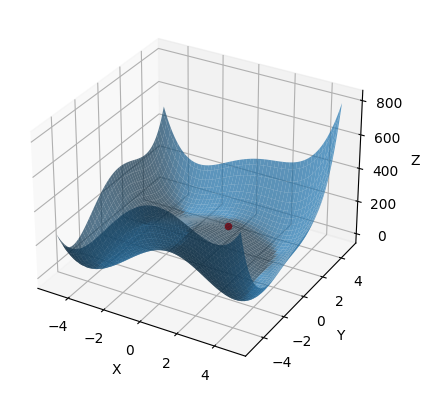

In [23]:
result = GD(Him, grad_Him, x, y)
gd_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Himmelblau: {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Him(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = GD(Him, grad_Him, x, y)
ax.scatter(point[0][gd_ind], point[1][gd_ind], point[2][gd_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

X: [-5.93985729 -7.90297649 -7.32243805 -4.98938511 -5.7154169  -5.58116201
 -5.403286   -4.69111074 -6.16267676 -4.37717529]
Y: [ 1.72609514  1.83010951  4.08492289 -2.10903216 -0.79912419 -2.49563572
  3.52165243 -2.0217292   2.65900127 -1.46497633]
Himmelblau: [ 775.62667278 2973.00745544 2186.76149572  195.75685148  581.27562082
  352.01446699  471.63469536  138.54304912  915.50371633  130.0305602 ]


Text(0.5, 0, 'Z')

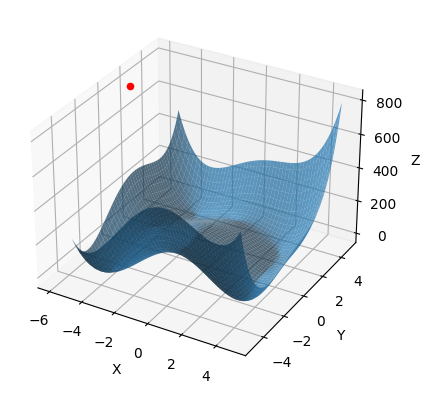

In [24]:
result = GD_LRS(Him, grad_Him, x, y)
gds_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Himmelblau: {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Him(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = GD_LRS(Him, grad_Him, x, y)
ax.scatter(point[0][gds_ind], point[1][gds_ind], point[2][gds_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Моментный метод

In [25]:
def MOM(f: Mapping, df: Mapping, x: np.ndarray, y: np.ndarray, lr: float = 0.1,
          iter: int = 100, lre: int = 7, lrdc: float = 0.1, lrmc: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Momentum optimization.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        iter (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        lrdc (float): Коэфициент уменьшения lr [0,1). Default = 0.1
        lrmc (float): Коэфициент сохранения момента Default = 0.9
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    n=np.zeros(df(x, y).shape)
    for i in range(iter):
        if ((i%lre)==0):
            lr *= lrdc
        n = lrmc * n - lr * (1 - lrmc) * df(x, y)
        x = x + n[0]
        y = y + n[1]
    return x, y, f(x, y)

X: [ 0.7108361   0.40832702 -0.5885262   2.65616565  1.93998322  2.76362695
 -0.07340482  2.65312286  0.23870993  2.42897371]
Y: [6.13422789 7.08068942 7.09544001 5.18807853 5.70201928 5.4195064
 6.11067149 5.05756594 6.36039588 4.98012807]
Buta (Momentum): [42.28455671 65.69504589 44.43451182 66.6434255  61.2412053  78.9588096
 27.43029703 62.04323801 38.89322716 52.45077287]


Text(0.5, 0, 'Z')

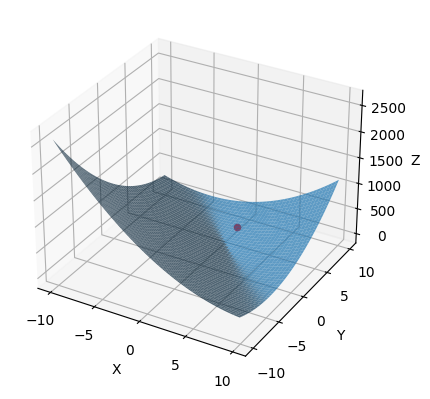

In [26]:
result = MOM(Buta,grad_Buta,x,y,lr=0.1,lre=20)
nag_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Buta (Momentum): {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Buta(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = MOM(Buta,grad_Buta,x,y,lr=0.1,lre=20)
ax.scatter(point[0][nag_ind], point[1][nag_ind], point[2][nag_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

X: [ 2.72346328 -3.23500316  0.0435253  -3.67691754  3.59948325 -3.63332541
  3.0667728  -3.60723177  2.00908364 -3.5381261 ]
Y: [-0.31265618  3.22455272 -1.43762333 -3.32286072 -1.01281707 -3.69972704
  1.21829088 -3.23153834 -0.11682135 -3.14497456]
Him (Momentum): [ 32.63639803   7.2614975  178.55665441   0.7778807    6.52940884
  11.57693818   6.13941216   1.51400317  74.90533268   3.064899  ]


Text(0.5, 0, 'Z')

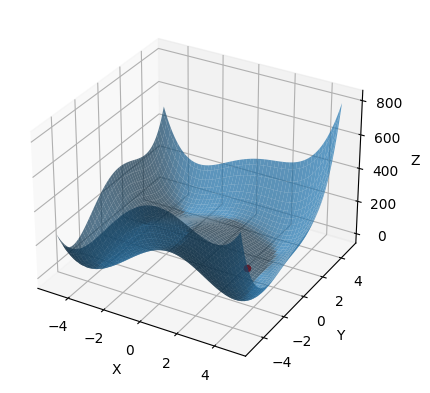

In [27]:
result = MOM(Him,grad_Him,x,y,lr=0.1,lre=20)
nag_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Him (Momentum): {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Him(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = MOM(Him,grad_Him,x,y,lr=0.1,lre=20)
ax.scatter(point[0][nag_ind], point[1][nag_ind], point[2][nag_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Адаптивный метод

In [30]:
def ADAPT(f: Mapping, df: Mapping, x: np.ndarray, y: np.ndarray, lr: float = 0.01,
          iter: int = 100, lre: int = 7, lrdc: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Adam.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x (np.ndarray): Стартовая точка 1
        y (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        iter (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        lrdc (float): Коэфициент уменьшения lr [0,1). Default = 0.1
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    for i in range(iter):
        if ((i%lre)==0):
            lr *= lrdc
        adaptC = df(x, y)**2
        n = lr * df(x, y) / (adaptC + 0.000000001)**0.5
        x = x - n[0]
        y = y - n[1]
        
    return x, y, f(x, y)

X: [-5.93977769 -7.90287809 -7.3223635  -4.98928433 -5.71531934 -5.58105221
 -5.40322614 -4.69101364 -6.1626024  -4.37708579]
Y: [ 1.7261634   1.83019244  4.08497863 -2.10893314 -0.79903246 -2.4955281
  3.52169845 -2.02163344  2.65906199 -1.46488865]
Buta (Adaptive): [319.6370125  486.465673   279.95787161 554.65444818 501.73453653
 656.88624583 179.64294591 516.64766841 276.63158627 436.30612554]


Text(0.5, 0, 'Z')

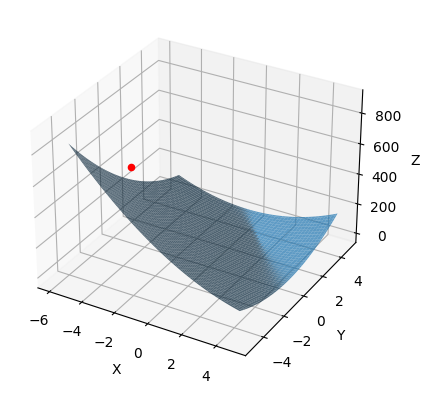

In [31]:
result = ADAPT(Buta, grad_Buta,x,y,lr=0.1,lre=50,lrmc=0.8,lrmsc=0.9)
adm_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Buta (Adaptive): {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Buta(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = ADAPT(Buta,grad_Buta,x,y,lr=0.1,lre=50,lrmc=0.8,lrmsc=0.9)
ax.scatter(point[0][adm_ind], point[1][adm_ind], point[2][adm_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

X: [-5.93921934 -7.90126864 -7.32107467 -4.98913479 -5.71491562 -5.58075513
 -5.40281656 -4.69092691 -6.16193388 -4.37703959]
Y: [ 1.72611189  1.83013151  4.08505495 -2.10894495 -0.79904384 -2.49553698
  3.52169586 -2.02164973  2.6590068  -1.46490884]
Himmelblau (Adaptive): [ 775.21955273 2970.0926163  2184.92094982  195.70181236  581.03087614
  351.85871528  471.41626877  138.51557921  914.95201407  130.01670518]


Text(0.5, 0, 'Z')

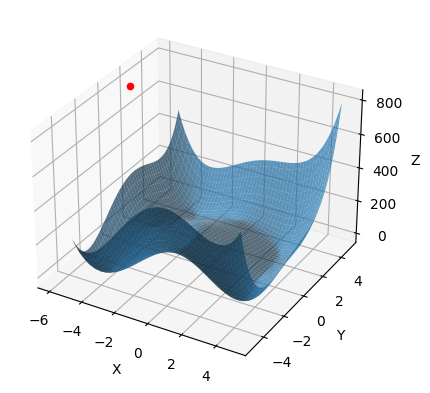

In [32]:
result = ADAPT(Him,grad_Him, x,y,lr=0.1,lre=50,lrmc=0.8,lrmsc=0.9)
adm_ind = 0
print(f'''X: {result[0]}
Y: {result[1]}
Himmelblau (Adaptive): {result[2]}''')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Him(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.7)
point = ADAPT(Him,grad_Him,x,y,lr=0.1,lre=50,lrmc=0.8,lrmsc=0.9)
ax.scatter(point[0][adm_ind], point[1][adm_ind], point[2][adm_ind], color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')